
# Klausur Data Science I 
## Sommersemester 23, 28.08.23


## Generelle Information

* Sie haben eine Woche Zeit, um die Klausur zu bearbeiten. 
* Sie dürfen alle Quellen frei verwenden, müssen diese aber korrekt benennen. Sollten Sie ChatGPT oder eine ähnliche Software nutzen, müssen Sie den Prompt mit angeben.
* Die zur Verfügung gestellten Datensätze sind *echte* Daten und nicht verfälscht oder simuliert.
* Sie dürfen **nur** folgende Packages nutzen: `numpy, pandas, scipy, sklearn, matplotlib, seaborn, statsmodels` und Python standard libraries
* Code muss ausreichend kommentiert sein um nachvollziehbar zu sein. Schreiben Sie Funktionen wann immer Sie Code mehrfach verwenden. Folgen Sie im Allgemeinen den Richtlinien aus der Vorlesung. Punktabzug aufgrund von schlecht strukturiertem oder unverständlichem Code sind möglich.
* **Begründen** Sie Entscheidungen bezüglich der Wahl von Plots, Hypothesentests, etc immer schriftlich und **interpretieren** Sie Ihre Ergebnisse.
* Sie dürfen sich **nicht** von anderen Personen in irgendeiner Weise helfen oder beraten lassen. 
* Bitte geben Sie das komplette Repository als `.zip` Datei mit der Bezeichnung `nachname_matrikelnummer.zip` bis spätestens 4.9.2023 12:00 Uhr mittags in StudIP im Ordner `Klausur Abgabe` ab.
* Fügen Sie dem Ordner auch die unterschriebene Eigenständigkeitserklärung hinzu. 
* Falls Sie Fragen haben, wenden Sie sich bitte rechtzeitig über Rocketchat an uns. 


# 0 Setup

#### 1. Nutzen Sie das Grundgerüst aus dem gegebenen Repository und setzen Sie ein Dockerfile auf, sodass wir lediglich das gegebene `docker_compose` ausführen müssen, um Ihre Lösung im Notebook auszuführen. 
    - Das Dockerfile soll auf Basis des `jupyter/minimal-notebook` Image gebaut werden.
    - Stellen Sie sicher dass Ihr Setup mit den Befehlen `docker compose create run_notebook` und `docker compose start run_notebook` (in älteren Versionen könnte der Befehl auch `docker-compose` heißen) gestartet werden kann und man sich daraufhin per `http://127.0.0.1:10000/` mit dem Token, welches Sie in `docker-compose.yml` gesetzt haben, einloggen kann.
#### 2. Führen Sie in den nachfolgenden Aufgaben sinnvolles Versiontracking mit Git Commits durch (die Git-Historie mit sinnvollen Commits soll am Ende durch `git log` klar ersichtlich sein). Ihr Code darf **nicht** in einem **öffentlichen** Repository gespeichert werden, da er sonst für andere Studenten einzusehen wäre und Sie sich somit der Beihilfe eines Täuschungsversuches schuldig machen.

In [1]:
!git config --global user.name "cubeskills"
!git config --global user.email "paul-dinkler@t-online.de"
!git init

# Da ich einen Mac benutze bei dem aus irgend einem Grund der Kernel abstürtzt (mein anderer Laptop ist kaputt)
# , wenn ich matplotlib importiere, habe ich
# in der gwdg-cloud gearbeitet. Dadurch gibt es einige Probleme mit Docker und git. Docker habe ich nicht mit eingebunden und Git 
# hat natürlich in der Cloud funktioniert, sollte aber bei erneutem ausführen von "git log" nicht den richtigen log zeigen, weil
# ich die .ipynb Datei nach dem erstellen in einem Ordner auf meinem mac gespeichert habe, um ihn anschließend hochzuladen...





441.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
446.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
452.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /home/jovyan/dinkler_15127903/.git/


In [2]:
!git add *
!git status

485.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
493.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   Dockerfile
	new file:   bikes_goettingen.csv
	new file:   bikes_rostock.csv
	new file:   docker-compose.yml
	new file:   exam_dinkler.ipynb
	new file:   locations_rostock.csv

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/



# 1 Data Preprocessing 

#### 1. Entpacken Sie die Datei 'datasets.zip', die Sie auf StudIP in dem Ordner 'Exam_1' finden. Laden Sie anschließend die darin enthaltenen drei Datensätze in Pandas: 


- bikes_goettingen.csv
    - Dieser Datensatz beinhaltet die stündlichen Fahrradzähldaten unterschiedlicher Fahrradmonitore (2013-2023), die im Göttinger Stadtgebiet zu finden sind.

- bikes_rostock.csv ([Quelle](https://www.opendata-hro.de/dataset/radmonitore))
    - Dieser Datensatz beinhaltet die viertelstündlichen Fahrradzähldaten unterschiedlicher Fahrradmonitore (2013-2023), die im Rostocker Stadtgebiet zu finden sind.

- locations_rostock.csv ([Quelle](https://www.opendata-hro.de/dataset/radmonitore))
    - Dieser Datensatz beinhaltet die Standorte der Fahrradmonitore in Rostock mit Namen und Koordinaten.

In [38]:
import pandas as pd

# Speichern der Daten in Dataframes
bikes_goettingen = pd.read_csv("bikes_goettingen.csv",sep=";")
bikes_rostock = pd.read_csv("bikes_rostock.csv")
locations_rostock = pd.read_csv("locations_rostock.csv")


#### 2. Ersetzen Sie die Standort-IDs des Datensatzes `bikes_rostock` durch die Standortbezeichnungen, die Sie im Datensatz `locations_rostock` finden.

In [39]:
# Id und Ort werden in einem Dictionary gespeichert
unique_ids = locations_rostock["id"].unique()
unique_locations = locations_rostock["bezeichnung"].unique()
dic = {}
for i in range(11):
    dic[unique_ids[i]] = unique_locations[i]

# Es werden alle Id's mit dem entsprechenden Ort ersetzt 
bikes_rostock["standort_id"].replace(dic,inplace=True)
bikes_rostock.head()



,standort_id,zeitpunkt,summe
0,Hamburger Straße/Liningweg,2013-11-01T00:00:00+01:00,0
1,Hamburger Straße/Liningweg,2013-11-01T00:15:00+01:00,0
2,Hamburger Straße/Liningweg,2013-11-01T00:30:00+01:00,1
3,Hamburger Straße/Liningweg,2013-11-01T00:45:00+01:00,0
4,Hamburger Straße/Liningweg,2013-11-01T01:00:00+01:00,0


#### 3. Gleichen Sie die Datensätze aus Rostock und Göttingen so an, dass beide das gleiche Format haben. Achten Sie dabei insbesondere auf die richtige Formatierung und das identische Intervall der Zählungszeitpunkte.

In [40]:

# Zu datetime Objekten umwandeln
bikes_goettingen["Time"] = pd.to_datetime(bikes_goettingen["Time"],utc=True)
bikes_rostock["zeitpunkt"] = pd.to_datetime(bikes_rostock["zeitpunkt"],utc=True)

# Addiere alle viertelstündlichen Werte zu einer vollen Stünde auf und behalte nur die Einträge die einer vollen Stunde zugehörig sind.
# Quelle: https://stackoverflow.com/questions/70962098/get-mean-of-every-4-rows, 28.08.2023
bikes_rostock["summe"] = bikes_rostock.groupby(bikes_rostock.index//4)["summe"].transform("sum")
bikes_rostock = bikes_rostock[bikes_rostock["zeitpunkt"].dt.minute == 0]

# Spaltennamen und Reihenfolge anpassen
bikes_rostock = bikes_rostock.reindex(columns=["zeitpunkt","standort_id","summe"])
bikes_rostock = bikes_rostock.rename(columns={"zeitpunkt":"Time","standort_id":"location","summe":"value"})
bikes_rostock = bikes_rostock.reset_index(drop=True)

# Quelle: https://stackoverflow.com/questions/67336093/transpose-one-row-to-column-in-pandas,28.08.2023
bikes_goettingen = pd.melt(bikes_goettingen,id_vars=["Time"],var_name=["location"]) # 
bikes_rostock


,Time,location,value
0,2013-10-31 23:00:00+00:00,Hamburger Straße/Liningweg,1
1,2013-11-01 00:00:00+00:00,Hamburger Straße/Liningweg,1
2,2013-11-01 01:00:00+00:00,Hamburger Straße/Liningweg,1
3,2013-11-01 02:00:00+00:00,Hamburger Straße/Liningweg,0
4,2013-11-01 03:00:00+00:00,Hamburger Straße/Liningweg,2
...,...,...,...
796519,2023-08-13 17:00:00+00:00,Uni-Campus,11
796520,2023-08-13 18:00:00+00:00,Uni-Campus,8
796521,2023-08-13 19:00:00+00:00,Uni-Campus,15
796522,2023-08-13 20:00:00+00:00,Uni-Campus,2


#### 4. Sowohl in Göttingen als auch in Rostock gibt es Stationen, die zum Zeitpunkt der Datenerhebung noch nicht in Betrieb waren. Schreiben Sie eine Funktion, die die erste Zählung der jeweiligen Stationen erkennt, alle vorherigen Werte auf `np.nan` setzt und wenden Sie diese auf Ihre Dataframes an.

In [41]:
import numpy as np

# Diese Funktion wandelt alle 0-Werte bis zu dem ersten nicht 0-Wert für jeden Ort in NaN um
def make_leading_zeros_to_nan(df):
    
    # Iteriere durch alle Orte und speichere den Index des ersten Auftretens eines neuen Ortes und speichere den Index des ersten nicht 0-Werts.
    # Setze die 0-Werte dazuzwischen auf NaN
    for location in df["location"].unique():
        first_index_of_new_location = df[(df["location"] == location)].index[0]
        first_non_zero_index = df[(df["location"] == location) & (df["value"] >0.0)].index[0]
        df.loc[first_index_of_new_location:first_non_zero_index-1,"value"]= np.nan
    return df

# Wende die Funktion auf die Datensätze an
bikes_goettingen = make_leading_zeros_to_nan(bikes_goettingen)
bikes_rostock = make_leading_zeros_to_nan(bikes_rostock)


In [8]:
!git commit -m "InitIieren und Formattieren von bikes_goettinge und bikes_rostock"

616.01s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[master (root-commit) 360b191] InitIieren und Formattieren von bikes_goettinge und bikes_rostock
 6 files changed, 3271631 insertions(+)
 create mode 100644 Dockerfile
 create mode 100644 bikes_goettingen.csv
 create mode 100644 bikes_rostock.csv
 create mode 100644 docker-compose.yml
 create mode 100644 exam_dinkler.ipynb
 create mode 100644 locations_rostock.csv


# 2 Explorative Analyse

#### 1. Visualisieren Sie das *jährliche* Fahrradaufkommen von 2013 bis 2023 einzeln für beide Städte und gemittelt über alle Stationen in jeweils einem geeignetem Diagramm. 
**Hinweis:** Stellen Sie sicher, dass Ihr Code zum Plotten der Daten wiederverwendbar ist (siehe Aufgabe 2.2).

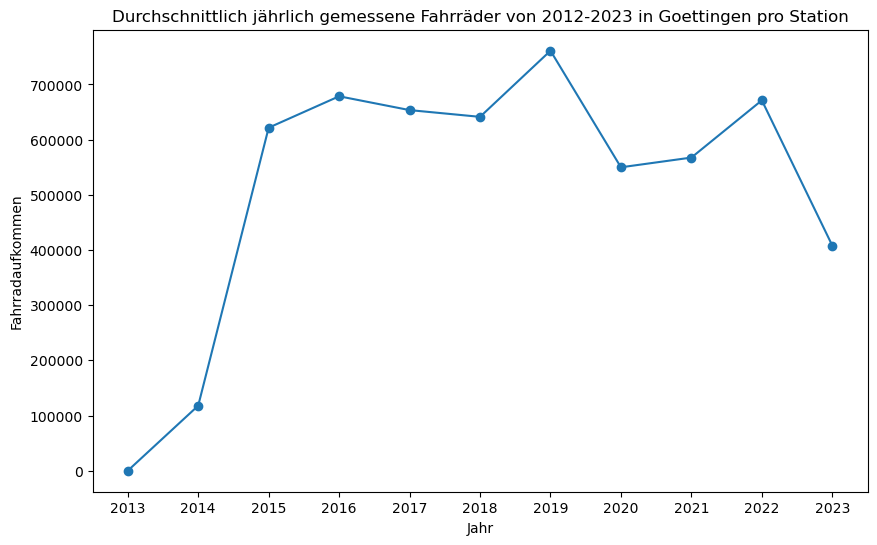

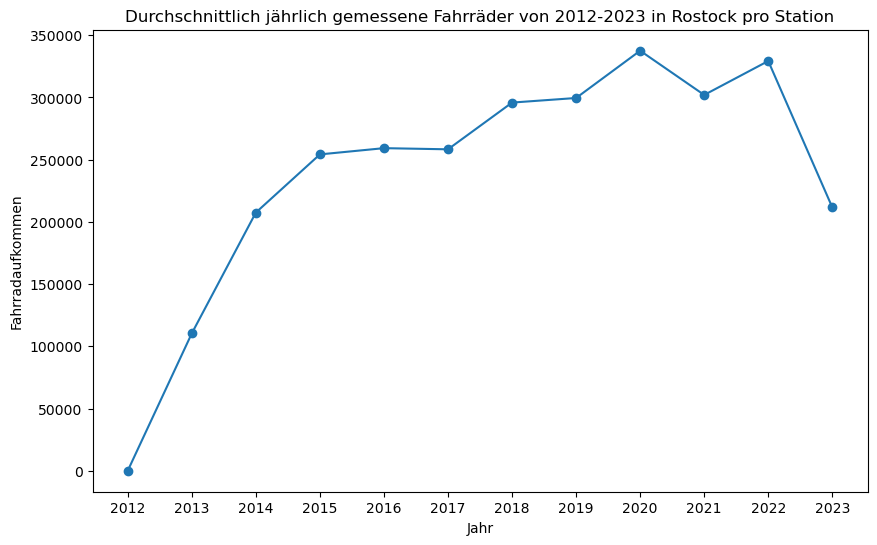

In [46]:
import matplotlib.pyplot as plt

def visualize_bikes_per_year(dataframe,city):
        
        # Füge die Spalte Jahr zum Indexen hinzu und addiere alle werten zum zugehörigen Jahr
        dataframe["year"] = dataframe["Time"].dt.year
        dataframe_average = dataframe.groupby("year")["value"].sum()/(len(dataframe["location"].unique()))
        dataframe_average = dataframe_average.reset_index()
        # Plot Diagramm
        plt.figure(figsize=(10,6))
        plt.plot(dataframe_average["year"], dataframe_average["value"], marker="o")
        plt.title(f'Durchschnittlich jährlich gemessene Fahrräder von 2012-2023 in {city} pro Station')
        plt.ylabel("Fahrradaufkommen")
        plt.xlabel("Jahr")
        plt.xticks(dataframe_average["year"])
        plt.show()
    
    
visualize_bikes_per_year(bikes_goettingen,"Goettingen")
visualize_bikes_per_year(bikes_rostock,"Rostock")
# Ich habe hier einen normalen Linienplot mit marker="o" verwendet, weil man so relativ präzise die Werte ablesen kann und das Diagramm
# übersichtlich ist.
# In beiden Städten kann man die Diagramme nicht zur Auswertung des tatsächlichen Fahrradaufkommens verwenden
# weil bei beiden Datensätzen einige Stationen erst spät z.B. 2017 angefangen haben zu messen. Wir sehen
# dies sehr deutlich in den Jahren 2013/2014, weil dort die Werte bei beiden Diagrammen sehr gering sind.
# Was sich allerdings sinnvoll schlussfolgern lässt, ist das 2019 in Göttingen das Fahrradaufkommen sehr 
# viel größer als 2020 war, da alle Stationen in diesem Zeitraum durchgehend gemessen haben. Bei Rostock
# scheint das Fahrradaufkommen zu steigen, das liegt allerdings vermuttlich auch daran, dass einige Stationen
# erst spät bzw. mitten im Jahr angefangen haben zu messen.

#### 2. Fokussieren Sie sich auf eine Station je Stadt und stellen Sie die Entwicklung des Fahrradaufkommens für diese Station wie in Aufgabenteil 2.1 dar. Argumentieren Sie für Ihre Auswahl der jeweiligen Stationen.

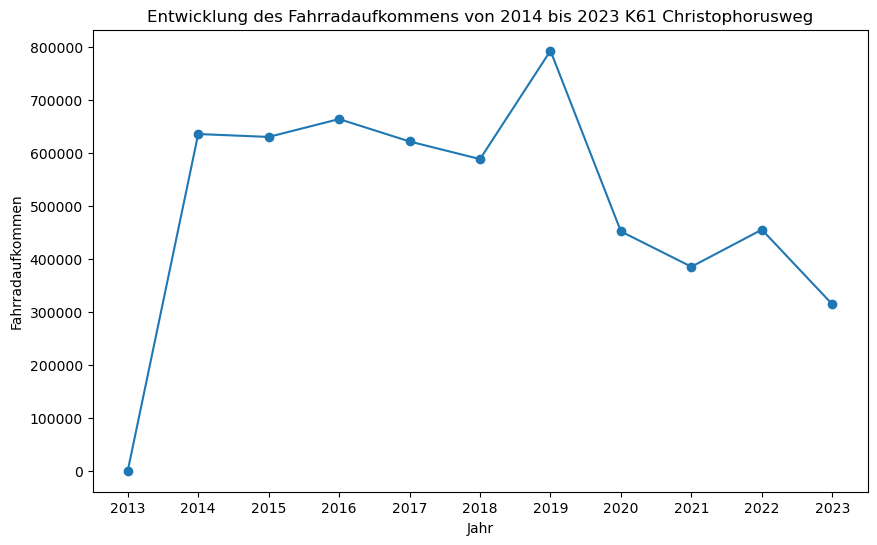

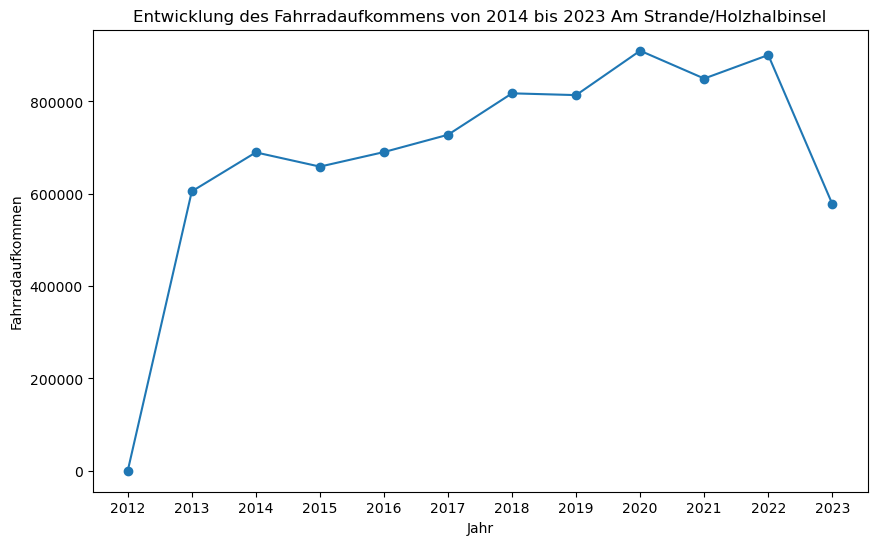

In [45]:
# Funktion zum Plotten der jährlichen Zählungen für einen bestimmten Ort
def yearly_bikes_per_station(dataframe,idx):
    
    # Addiere für jedes Jahr für den Ort die Fahrradzählung auf und gruppiere das Dataframe nach den Jahren
    location = dataframe["location"] == dataframe["location"].unique()[idx]
    dataframe_location = dataframe[location]
    dataframe_location.loc[:,"year"] = dataframe_location["Time"].dt.year
    dataframe_average = dataframe_location.groupby("year")["value"].sum().reset_index()
    
    # Plotten
    plt.figure(figsize=(10,6))
    plt.plot(dataframe_average["year"], dataframe_average["value"], marker="o")
    plt.xlabel("Jahr")
    plt.ylabel("Fahrradaufkommen")
    plt.title("Entwicklung des Fahrradaufkommens von 2014 bis 2023 " + str(dataframe["location"].unique()[idx]))
    plt.xticks(dataframe_average["year"])
    plt.show()



yearly_bikes_per_station(bikes_goettingen,4)
# Ich habe den K61 Christophorusweg für Goettingen ausgewählt, da er die Jahre von 2014 bis 2023 abdeckt und viele Daten 
# bereitstellt

yearly_bikes_per_station(bikes_rostock,3)
# Ich habe für Rostock Am Strande/Holzhalbinsel ausgewählt, weil mit Abstand die meissten Daten bereitgestellt und
# ebenfalls die Jahre von 2014 bis 2023 dargestellt werden.

# Ich habe wieder Linienplots aus den gleichen Gründen verwendet. man sieht eine stetige Abnahme des Fahrradaufkommens
# bis auf das Jahr 2019, welches mit ca 800000 Fahrrädern einen Höhepunkt hat. 2013 kann nicht mit einbezogen
# werden, da erst gegen Ende des Jahres angefangen wurde zu messen.

#### 3. Vergleichen Sie die Diagramme aus den vorherigen beiden Aufgaben miteinander. Was fällt Ihnen auf? Diskutieren Sie die Vorteile und Nachteile der beiden Visualisierungen hinsichtlich der generellen Entwicklung des Fahrradverkehrs in den Städten.

In [8]:
# Die Goettingen und die Rostock Diagramme sehen recht ähnlich aus, allerdings fallen kleine unterschiede auf. Zum einen
# ist der Graph des Rostock Diagramms mit den gemittelten werden am Anfang eher niedriger als der, der einzelnen Station.
# Das liegt daran, dass hier die gemittelten Werte repräsentiert werden und neben den Stationen die erst später angefangen
# haben zu messen einige Messungen nicht ab anfang des Jahres gestartet haben und somit weniger Wert miteinbringen.
# Die Jahre ab 2020 sehen in beiden Rostock Diagrammen rech ähnlich aus, was darauf schließen lässt, dass die einzelne Station
# das Fahrradaufkommen recht gut repräsentiert. Die Goettingen Diagramme weisen nur einen kleinen Unterschied am Anfang und am Ende
# auf. Die Station Christophorusweg fängt schon 2013 an zu messen und ist 2014 auf einem durchschnittlich hohen Wert im Vergleich
# zu den anderen Jahren. Das Diagramm mit den Durchschnittswerten zeigt eher niedrige Werte 2014, wahrscheinlich, weil die
# Stationen erst spät angefangen haben zu messen oder zwischendurch ausgefallen sind und dadurch noch viele NullWerte haben.
# Interessant in beiden Goettingen Diagrammen ist der Peak 2019, der ein ungewöhnlich hohes Fahrradaufkommen signalisiert.
# Alle Diagramme weisen einen niedrigen Wert 2013 auf, weil die Messungen nur bis zum August gehen.
# Durch eine einzelne Station können zwar nur bedingt Erkenntnisse über die gesamte Stadt erhalten werden
# allerdings ist es so möglich über mehrere Jahre hinweg einen Trend zu beobachtet, da man eine Station
# aussuchen könnte die zentral gelegen ist und Messungen zu vielen Jahren bereitstellt. Bei mehreren Stationen
# gibt es immer welche die Ausfallen oder einfach noch nicht aktiv sind, wodurch die Daten falsch interpretiert
# werden könnten. Eine Station hat allerdings offensichtlich nur eine begrentzte Repräsentativität, da nur ein Ort 
# abgebildet wird. Außerdem sind keine Vergleichsmöglichkeiten geboten. Mehrer Stationen bieten natürlich ein umfassendes
# Bild des Fahrradverkehrs und eine bessere kapazitätsplaung, falls man aufgrund der Daten die Infrastruktur der Stadt anpassen
# wollen würde. Wie gesagt sind allerdings mehr Herausforderungen bei der Dateninterpretation gegeben.




#### Am 01.01. findet in Rostock mit dem jährlichen Warnemünder Turmleuchten das größte Neujahrsevent Europas statt ([Quelle](https://www.lifepr.de/pressemitteilung/tourismuszentrale-rostock-und-warnemuende-buero-hanse-sail/Europas-groesstes-Neujahrsevent-Warnemuender-Turmleuchten-feiert-2023-mit-Lasern-Feuerwerk-und-Musik/boxid/928499#:~:text=Warnem%C3%BCnde%2015.12.2022-,Europas%20gr%C3%B6%C3%9Ftes%20Neujahrsevent%3A%20Warnem%C3%BCnder%20Turmleuchten%20feiert,mit%20Lasern%2C%20Feuerwerk%20und%20Musik&text=Nach%20der%20Absage%202021%20und,und%20wird%20kostenfrei%20erlebbar%20sein.)). 
#### 4. Vergleichen Sie in einem ersten Schritt das tägliche Fahrradaufkommen an der Station *Warnemünde Wetterwarte* am 01.01. mit dem durchschnittlichen Tagesaufkommen im Januar über alle Jahre und veranschaulichen Sie den Verlauf in einem geeigneten Plot. Was fällt Ihnen auf? Suchen Sie nach plausiblen Erklärungen für diesen Verlauf.

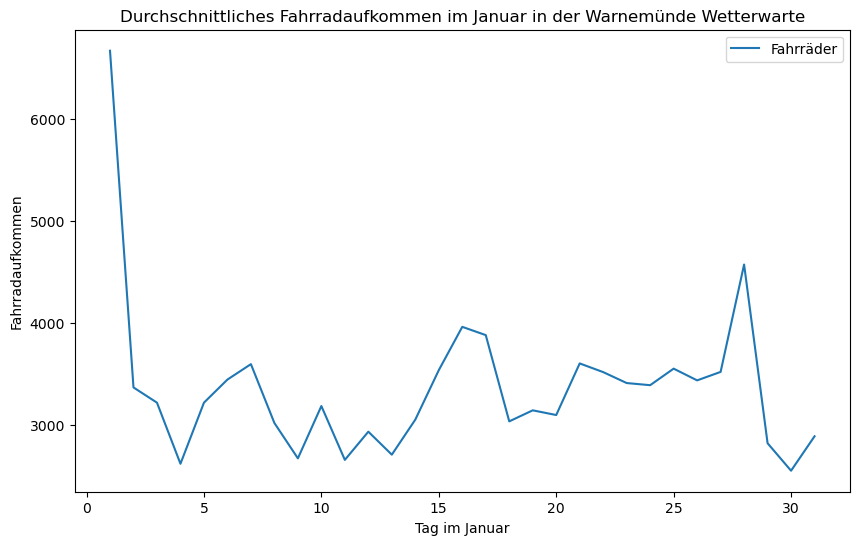

In [49]:
# Filter für Januar und Warnemünde Wetterwarte
month_filter = bikes_rostock["Time"].dt.month == 1 
station_filter = bikes_rostock["location"] == "Warnemünde Wetterwarte"

# Filter andwenden und den Datensatz nach den Tagen gruppieren
rostock_filtered = bikes_rostock[month_filter & station_filter]
rostock_filtered = rostock_filtered.groupby(rostock_filtered["Time"].dt.day)["value"].sum()

# Plot
plt.figure(figsize=(10,6))
plt.plot(rostock_filtered.index,rostock_filtered.values,label="Fahrräder")
plt.xlabel("Tag im Januar")
plt.ylabel("Fahrradaufkommen")
plt.title("Durchschnittliches Fahrradaufkommen im Januar in der Warnemünde Wetterwarte")
plt.legend()
plt.show()

# Hier wurde ein Linienplot verwendet, da man sehr präzise ablesen kann in welcher Größenordnung das Fahrradaufkommen
# im Vergleich ziwschen dem 01.01 und dem Rest dem Monats ist.
# Im Diagramm ist zu sehen, dass das Fahrradaufkommen am 01.01 selbst sein globales Maximum erreicht und dann die Tage danach auf
# einen eher durchschnittlichen Wert herabfällt. Auch interessant ist, dass am Tag vor dem 01.01 also dem 30.12 dass Fahrradaufkommen
# ein globales Minimum erreicht. Ersteres lässt sich leicht erklären: Die Menschen fahren zum Fest hin und wieder zurück am nächsten morgen.
# Man kann davon ausgehen, dass das globale Minimum am 30. durch Vorarbeiten zu erklären ist, es könnte sein dass einige Straßen 
# gesperrt sind und deswegen weniger Menschen an diesem Ort vorbeifahren.
    

#### 5. Untersuchen Sie mithilfe eines geeigneten Plots das **stündliche** Fahrradaufkommen für die Station *Warnemünde Wetterwarte* im Januar. Vergleichen Sie hierzu das stündliche Fahrradaufkommen am Festtag mit den stündlichen Mittelwerten des restlichen Monats Januar. Nutzen Sie Ihre Überlegungen aus der vorherigen Aufgabe, beziehen Sie alle **relevanten** Jahre ein und wählen Sie einen Plot, der auch die Varianz über die Jahre berücksichtigt. Beschreiben und interpretieren Sie Ihr Ergebnis.

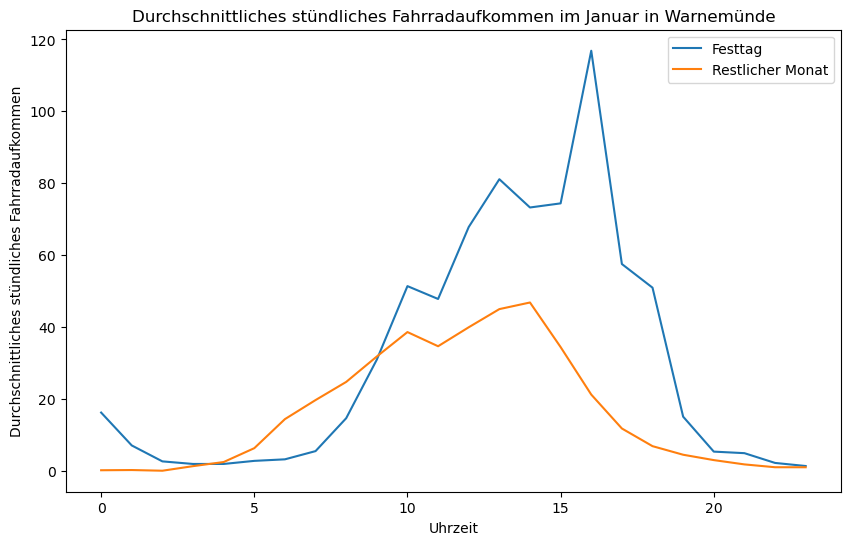

In [50]:
import seaborn as sns

# Nach Monat, Warnemünde Wetterwarte und Jahre 2017 -2023 filtern, weil erst Ende 2016 Daten gesammelt wurden und somit
# 2016 noch keine Daten im Januar vorliegen. 2023 liegen schon Daten im Januar vor
month_filter = bikes_rostock["Time"].dt.month == 1
station_filter = bikes_rostock["location"] == "Warnemünde Wetterwarte"
year_filter = bikes_rostock["Time"].dt.year > 2016 
rostock_filter = bikes_rostock[month_filter & station_filter & year_filter]

# Stündliches Fahrradaufkommen am Festtag und im rest des Monats
january_first_average = rostock_filter[rostock_filter["Time"].dt.day == 1].groupby(rostock_filter["Time"].dt.hour)["value"].mean()
january_without_first_day_average = rostock_filter[rostock_filter["Time"].dt.day != 1].groupby(rostock_filter["Time"].dt.hour)["value"].mean()


# Plotten des durchschnittlichem Fahrradaufkommens in Warnemünde im Januar
plt.figure(figsize=(10,6))
plt.plot(january_first_average.index,january_first_average.values,label="Festtag")
plt.plot(january_without_first_day_average.index, january_without_first_day_average.values,label="Restlicher Monat")
plt.title("Durchschnittliches stündliches Fahrradaufkommen im Januar in Warnemünde")
plt.xlabel("Uhrzeit")
plt.legend()
plt.ylabel("Durchschnittliches stündliches Fahrradaufkommen")
plt.show()

# Wie im Diagramm zu sehen ist, ist die Varianz des stündlichen Fahrradaufkommens am Festtag sehr viel größer als im restlichen Monat.
# Das liegt daran das sehr viel mehr Fahrräder am Festtag gemessen werden und es natürlich auch Zeiten gibt zu denen nahezu kein Fahrrad 
# an der Station vorbei fährt. Auffällig ist, dass um 15 durchschnittlich knapp 120 Fahrräder am Festtag pro Stunde gemessen werden,
# was sich natürlich durch den Ansturm für das Fest am Abend erklären lässt. Aber auch im restlichen Monat sind gegen 14:00-
# 15:00 Uhr am meisten Menschen auf dem Fahrrad unterwegs, wahrscheinlich wegen dem Schulverkehr. Gegen Abend nehmen die Fahrradfahrer ab.
# Interessant ist noch der Abfall um 00:00 am Festtag. Es könnte sein, dass die Menschen schon am Tag vor dem Festtag feiern 
# gehen und um 00:00 bzw. 01:00 nach Hause fahren.
# Wie auch bei den Vorherigen Plots sind hier Liniendiagramme angebracht. Sie visualisieren sehr gut die stündliche Differenz
# der Fahrradaufkommen und sind leicht interpretierbar.
# Linienplots aus vorher genannten Gründen


In [17]:
!git add exam_sose2023.ipynb
!git commit -m "Bearbeitung der zweiten Aufgabe: Visualisierung der Dataframes in Hinblick auf tägliches und stündliches Fahrradaufkommen an bestimmten Stationen"


928.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
933.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[master 2fe5671] Bearbeitung der zweiten Aufgabe: Visualisierung der Dataframes in Hinblick auf tägliches und stündliches Fahrradaufkommen an bestimmten Stationen
 1 file changed, 130 insertions(+), 6 deletions(-)


# 3. Statistische Analyse

#### 1. Überprüfen Sie nun, ob der durchschnittliche Fahrradverkehr auf der Strecke an dem Festtag statistisch signifikant von den übrigen Januartagen abweicht. </br> Stellen Sie das Hypothesenpaar auf, wählen Sie einen geeigneten statistischen Test und treffen Sie eine Testentscheidung zum Signifikanzniveau von $\alpha$=5%.

In [51]:
# H0: Die Nullhypothese lautet, es gibt keinen signifikanten Unterschied
# zwischen dem Fahrradverkehr am 01.01 und dem des restlichen Monats
# H1: Die Alternativhypothese lautet, der Fahrradverkehr am 01.01 weicht
# signifikant von dem im restlichen Monat ab.
from scipy import stats

# Filter nach Monat und Station
month_filter = bikes_rostock["Time"].dt.month == 1
station_filter = bikes_rostock["location"] == "Warnemünde Wetterwarte"

# Anwenden des Filters
rostock_filtered = bikes_rostock[month_filter & station_filter]

# Unterteilung in Festtag und dem restlichen Monat
festtag_hours = rostock_filtered[rostock_filtered["Time"].dt.day == 1]["value"]
restlicher_monat_hours = rostock_filtered[rostock_filtered["Time"].dt.day != 1]["value"]
festtag_hours

# T Statistik und P Wert für unabhängige Stichproben berechnen, hier habe ich den T-test verwendet, weil er sehr gut geeignet
# ist um unabhängig und identisch verteilte Zufallsvariablen auf Gleichheit zu testen, außerdem ist er leicht implementierbar
# Quelle: https://stackoverflow.com/questions/66081234/stats-ttest-ind-vs-manual-computation-of-students-independent-t-test-diff, 29.08.2023
t_statistic, p_value = stats.ttest_ind(abs(festtag_hours), abs(restlicher_monat_hours))

# Signifikanzniveau
alpha = 0.05

# Ausgabe ob die H0 Hypothese angenommen oder abgelehnt werden sollte
if p_value < alpha:
    print("Die Nullhypothese kann abgelehnt werden, da der durchschnittliche Fahrradverkehr am 01.01 signifikant höher als im Rest des Monats ist." )
else:
    print("Die Nullhypothese wird beibehalten, da es keinen signifikanten Unterschied zwischen dem Fahrradverkehr am 01.01 und dem Rest des Monats gibt." )
print(p_value)

    

Die Nullhypothese kann abgelehnt werden, da der durchschnittliche Fahrradverkehr am 01.01 signifikant höher als im Rest des Monats ist.
9.839412849585394e-28


#### Zur Planung städtischer Infrastruktur sind einzelne Punktschätzer meist nur bedingt hilfreich. Anstelle von Punktschätzern können wir Verteilungen schätzen und daraus Konfidenzintervalle ableiten, die die Schwankungen der Auslastung berücksichtigen und somit eine höhere Aussagekraft besitzen.
#### 2. Geben Sie hierzu für die Station *K61 Christophorusweg* in Göttingen ein 95%-Konfidenzintervall für den durchschnittlichen täglichen Fahrradverkehr an. Bestimmen Sie zunächst die Populationsverteilung mithilfe von Bootstrapping und stellen Sie diese gemeinsam mit dem Konfidenzintervall in einem geeigneten Diagramm dar. 

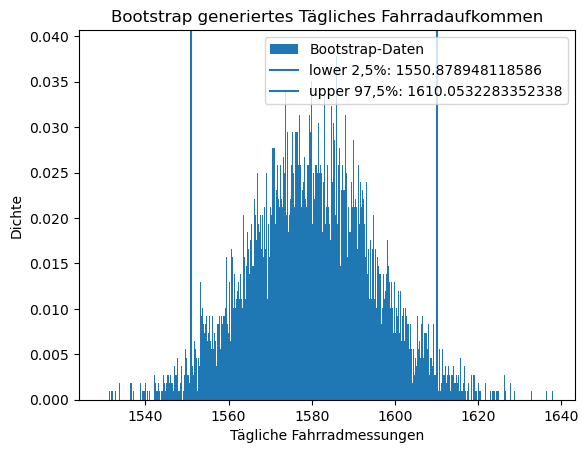

In [52]:
# Nach Christophorusweg filtern und nach Tag gruppieren, stündliche Messungen aufaddieren
# Quelle: https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html
filter_location = bikes_goettingen[bikes_goettingen["location"]=="K61 Christophorusweg"].dropna()
filter_location_grouped = filter_location.groupby(pd.Grouper(key="Time",freq="D")).agg({"value":"sum"})# 

# Array an gemessenen Werten des täglichen Fahrradverkehrs speichern
values = filter_location_grouped["value"].values
bootstrap_iterations = 10000
bootstrap_means =[]

# Bootstrapping 10000 iterationen
for _ in range(bootstrap_iterations):
    
    sample = np.random.choice(values,size=len(values),replace=True)
    mean = np.mean(sample)
    bootstrap_means.append(mean)

# Konfidenzintervall 95%
lower = np.percentile(bootstrap_means,2.5)
upper = np.percentile(bootstrap_means, 97.5)

# Plotten des Histogramms und des Konfidenzintervalls
plt.hist(bootstrap_means,bins=1000,label="Bootstrap-Daten",density=True)
plt.axvline(lower,label=f"lower 2,5%: {lower}")
plt.axvline(upper,label=f"upper 97,5%: {upper}")
plt.xlabel("Tägliche Fahrradmessungen")
plt.ylabel("Dichte")
plt.title("Bootstrap generiertes Tägliches Fahrradaufkommen")
plt.legend()
plt.show()
# Für den Plot habe ich ein Histogramm verwendet, da es vor allem normalisiert sehr gut darstelt wie der durchschnittliche
# tägliche Fahrradverkehr normalverteilt aufgefasst aussieht. Zudem habe ich für das Intervall zur besseren Veranschaulichung
# zwei senkrechte Linien verwendet, die die Intervallgrenzen darstellen. Sie grenzen 95% der Fläche des Histogramms ein.
# Ergebnis: die Wahrscheinlichkeit, dass der durchschnittliche tägliche Fahrradverkehr aus einer Stichprobe 1550 oder weniger beträgt, ist ca. 2.5 %.
# Die Wahrscheinlchkeit, dass der durchschnittliche tägliche Fahrradverkehr aus einer Stichprobe 1609 oder weniger beträgt, liegt
# bei 


#### Sie wurden damit beauftragt den Asphalt des Fahrradweges entlang des Christophorusweges zu erneuern. Sie können dabei zwischen zwei Arten von Asphalt wählen, die sich in Preis und Qualität unterscheiden. Der günstigere Asphalt sollte allerdings durchschnittlich nicht von mehr als 1.600 Fahrräder pro Tag befahren werden. 
#### 3. Testen Sie für Ihre Kaufentscheidung mithilfe der Populationsverteilung die Hypothese, dass an einem zufälligen Tag mehr als 1.600 Fahrräder an der Station beobachtet werden. Stellen Sie das Hypothesenpaar auf und treffen Sie eine Test-/Kaufentscheidung zum Signifikanzniveau von $\alpha$=5%. </br> Führen Sie anschließend einen parametrischen Einstichproben-t-Test durch. Weshalb unterscheiden sich die p-Werte? 


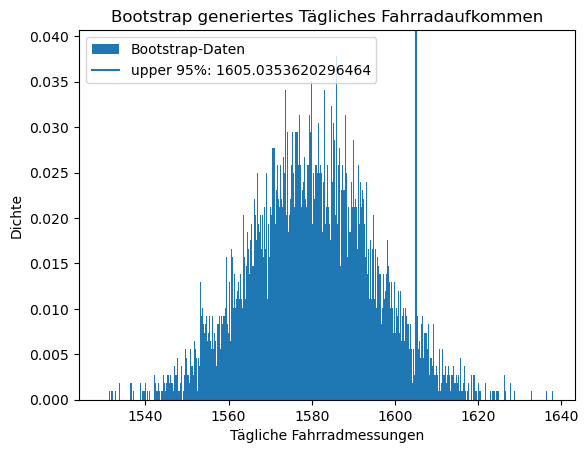

0.08843733625960526

In [53]:
# H0 Der durchschnittliche tägliche Wert an Fahrradmessungen
# ist höchstens 1600. H1 Der durchschnittliche tägliche Wert an 
# Fahrradmessungen ist größer als 1600.
# Da nach der Populationsverteilung der p-Wert für alpha = 0.05 einseitig
# ebenfalls über 1600 liegt, ist die Wahrscheinlichkeit hinrechend genug 
# gegeben, dass mehr als 1600 Fahrräder pro Tag an der Station vorbeifahren.
# Die H0 Hypothese wird abgelehnt. Ich habe mir hierfür das konfidenzintervall von [0,95] ausgeben
# lassen und die obere Grenze liegt bei ca 1604 und ist somit größer als 1600.

# Konfidenzgrenze 95%
upper_95 = np.percentile(bootstrap_means, 95.0)

# Plotten des Histogramms und des Konfidenzintervalls
plt.hist(bootstrap_means,bins=1000,label="Bootstrap-Daten",density=True)
plt.axvline(upper_95,label=f"upper 95%: {upper_95}")
plt.xlabel("Tägliche Fahrradmessungen")
plt.ylabel("Dichte")
plt.title("Bootstrap generiertes Tägliches Fahrradaufkommen")
plt.legend()
plt.show()
# Die Plots wurden aufgrund der gleichen Begründungen von 3.2 gewählt

# Parameter
bootstrap_means = np.array(bootstrap_means)
observed_mean = np.mean(bootstrap_means)
std_dev = np.std(bootstrap_means,ddof=1)

alpha = 0.05
hypothezised_mean = 1600

# Quelle: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
p_value = 1-stats.norm.cdf(1600,observed_mean,std_dev)

p_value
# Die p-Werte sind unterschiedlich, da hier verschiedene statistische Verfahren verwendet werden: Der letztere P-Wert basiert auf einem 
# parametischem t-Test und der Annahme, dass der Datensatz normalverteilt ist. Beim Bootstrappen wird keine Annahme
# über die Verteilung getroffen und ist somit robuster gegenüber Abweichungen von der Normalverteilung.
# Es ist ein empirischer Ansatz. Da jedoch beide p-Werte über 0.05 sind, sollte nicht zum günstigerem Asphalt
# gegriffen werden, da es hinreichend genug wahrscheinlich ist, dass mehr als 1600 Fahrrad im Durchschnitt
# pro Tag dort lang fahren.


In [21]:
!git add exam_sose2023.ipynb
!git commit -m "Bearbeitung der dritten Aufgabe: Statistische Analyse der Fahrradaufkommen"

1005.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1011.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[master cee345c] Bearbeitung der dritten Aufgabe: Statistische Analyse der Fahrradaufkommen
 1 file changed, 114 insertions(+), 27 deletions(-)


# 4 Machine Learning

#### Das Rathaus Rostock hat 2018 eine [Pressemitteilung](https://rathaus.rostock.de/de/fahrradsommer_an_der_warnow_zahl_der_radfahrenden_steigt_in_rostock/261823) zur Entwicklung des Fahrradverkehrs veröffentlicht. 
#### Darin behauptet der Mobilitätskoordinator der Stadt: "In den letzten Jahren konnten wir einen stetigen Zuwachs an Radfahrern beobachten."  Die Pressemitteilung beinhaltet zudem folgenden Plot:

![Bar Plot](https://rathaus.rostock.de/media/rostock_01.a.4984.de/datei/Diagramm2_Fahrradz%C3%A4hlstellen.gif)





#### 1. Analysieren Sie den gegebenen Plot. Was könnte man verbessern? Diskutieren Sie, ob dieser Plot (ohne weitere Informationen) die Aussage des Mobilitätskoordinators belegt.


In [16]:
# Der Plot visualisiert das jährliche gemessene Fahrradaufkommen
# in Rostock in den Jahren 2013 bis 2018. Der Abbildung zu entnehmen
# ist ein allgemeiner Trend der darlegt, dass im Schnitt immer mehr
# Menschen mit dem Fahhrad fahren.
# Problematisch hierbei ist die Tatsache, dass, wie wir wissen, die Messungen
# an verschieden Stationen stattfinden die allerdings nicht alle im Jahr
# 2013 in Betrieb genommen wurden. Entweder wurden die Zahlen von bestimmten
# Stationen genommen die von den Jahren 2013 bis 2018 in Betrieb waren,
# was man hätte spezifizieren müssen, oder es wurden alle Stationen
# für die Messung miteinbezogen. Letzteres hat allerdings die Folge,
# dass es für bestimmte Stationen beispielsweise erst ab 2017 Messungen gibt,
# weswegen die Regressionsgerade steigen würde. Ohne die Information welche Stationen für diesen Plot
# verwendet wurden, ist der Plot also wenig hilfreich. Würden alle Stationen für den Plot verwendet werden wäre 
# seine Aussagekraft außerdem verfälscht da wie gesagt einige Stationen zum Beispiel erst 2017 angefangen haben zu messen.
# Zudem ist die Aussage ohne hin ungenau formuliert, weil auch aufgrund des gegebenden Plots ersichtlich
# ist, dass das Fahrradaufkommen nicht stetig wächst, da es von 2014 auf 2015 fällt.


#### 2. Überprüfen Sie mithilfe einer linearen Regression und der Daten für Rostock, ob die Aussage des Mobilitätskoordinators statistisch abgesichert ist und entwerfen Sie einen verbesserten Plot. Interpretieren Sie Ihre Ergebnisse der Regression.

**Hinweis**: Treffen Sie eine sinnvolle Auswahl an Stationen und Jahren, die Sie in Ihre Analyse einbeziehen. 



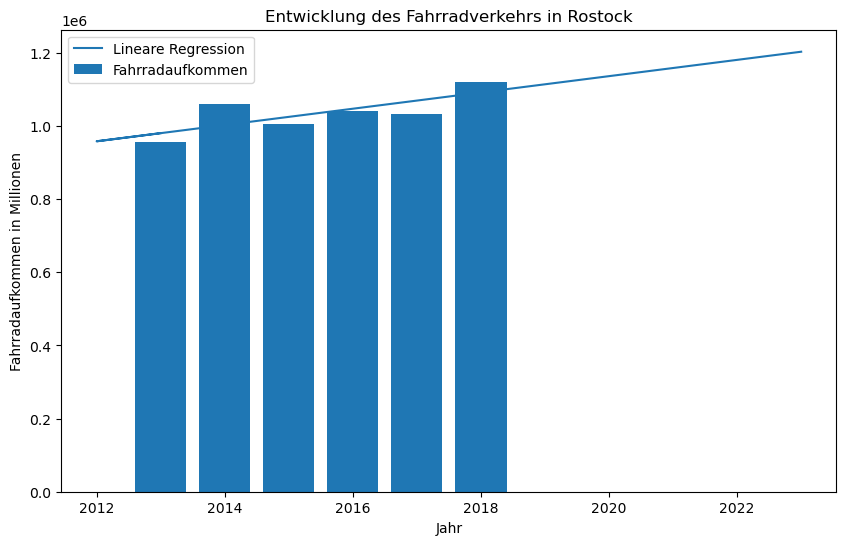

Die Aussage des Mobilitätskoordinators ist statistisch nicht abgesichert
0.08170025253673074


In [54]:
# ich habe mir erneut die Plots der einzelen stationen ausgeben lassen und mir ist aufgefallen, dass nur die Stationen
# Hamburgerstraße/Liningweg, Hamburgerstraßer/Braesigplatz, Lange Straße Süd und Am Strande/Holzhalbinsel voll von 2013 bis 2018
# Messungen tätigten (Plots nach der nächsten Zelle). Deswegen habe ich auch nur diese für meinen Plot verwendet.

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# nach Ort filtern und Daten nach Jahr selektieren
valid_locations = ["Hamburger Straße/Liningweg","Hamburgerstraßer/Braesigplatz","Lange Straße Süd","Am Strande/Holzhalbinsel"]
bikes_rostock["year"] = bikes_rostock["Time"].dt.year
bikes_rostock_select = bikes_rostock[(bikes_rostock["location"].isin(valid_locations))]
bikes_rostock_select = bikes_rostock_select[(bikes_rostock_select["year"] > 2012) & (bikes_rostock_select["year"] < 2019)]
df_rostock_grouped = bikes_rostock_select.groupby("year")["value"].sum().reset_index()

# Für lineare Regression reshapen und das Model an die Daten anpassen
# chatgpt: "Wie erstelle ich eine Lineare Regression in python"
x = df_rostock_grouped["year"].values.reshape(-1,1)
y = df_rostock_grouped["value"].values.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x,y)
x_all = bikes_rostock["year"].unique().reshape(-1,1)
y_pred = regression_model.predict(x_all)

# plotten der Regression und der Messungen
plt.figure(figsize=(10,6))
plt.bar(df_rostock_grouped["year"],df_rostock_grouped["value"],label="Fahrradaufkommen")
plt.plot(bikes_rostock["year"].unique(),y_pred,label="Lineare Regression")
plt.xlabel("Jahr")
plt.ylabel("Fahrradaufkommen in Millionen")
plt.title("Entwicklung des Fahrradverkehrs in Rostock")
plt.legend()
plt.show()

# p-Wert ermmitteln, 
# chatgpt: "wie kann ich mit python statsmodels und einer linearen Regression überprüfen ob eine Aussage statistisch abgesichert ist?"
const = sm.add_constant(x)
model = sm.OLS(y,const)
results = model.fit()
slope = results.params[1]
slope_std_error = results.bse[1]
t_value = slope/slope_std_error
p_value = 2*(1-stats.t.cdf(np.abs(t_value),df_rostock_grouped.shape[0]-2))

# Ergebnis
if p_value < 0.05:
    print("Die Aussage des Mobilitätskoordinators ist statistisch abgesichert")
else:
    print("Die Aussage des Mobilitätskoordinators ist statistisch nicht abgesichert")
print(p_value)    
# Interpretation: Der p-Wert von 0.088 zeigt dass es nicht statistisch abgesichert ist, dass die Aussage des Mobilitatskoordinators
# richtig ist. Es besteht also der hinreichende Verdacht, dass sie falsch ist. Somit lässt sich nicht sagen, dass der Fahrradverkehr
# zugenommen hat. Allerdings lässt sich durchaus zumindest visuell ein leichter Trend erkennen auch nachdem die relevanten Jahre
# und Stationen betrachtet werden.

In [55]:
# plotten der einzelnen Station um heraus zu finden, welche Station in welchem Jahr angefangen hat zu messen
def plot_loc(df,location):   
    bikes = df[df["location"] == location]
    bikes.loc[:,"year"] = bikes["Time"].dt.year
    bikes_grouped = bikes.groupby("year")["value"].sum().reset_index()


    plt.figure(figsize=(10,6))
    plt.bar(bikes_grouped["year"],bikes_grouped["value"],label="Fahrradaufkommen: " + location)
    plt.legend()
    plt.show()

# iteriere über jede Station und plotte die Werte auf der y-und das Jahr auf der x-Achse.
# for location in bikes_rostock["location"].unique():
    # print(location)
    # df =bikes_rostock.copy()
    # plot_loc(df,location)

#### 3. Führen Sie eine solche Analyse auch für die Station *K61 Christophorusweg* in Göttingen durch und interpretieren Sie das Ergebnis.

P-Wert: 0.07933307175579718


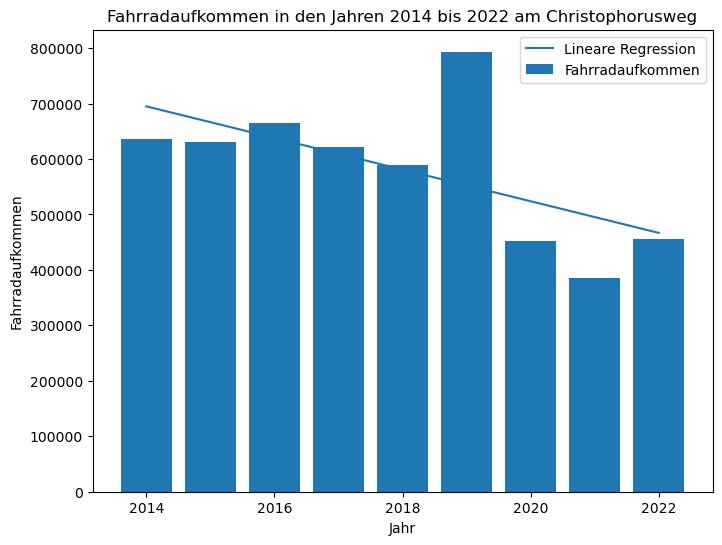

P-Wert: 0.002085321951531327


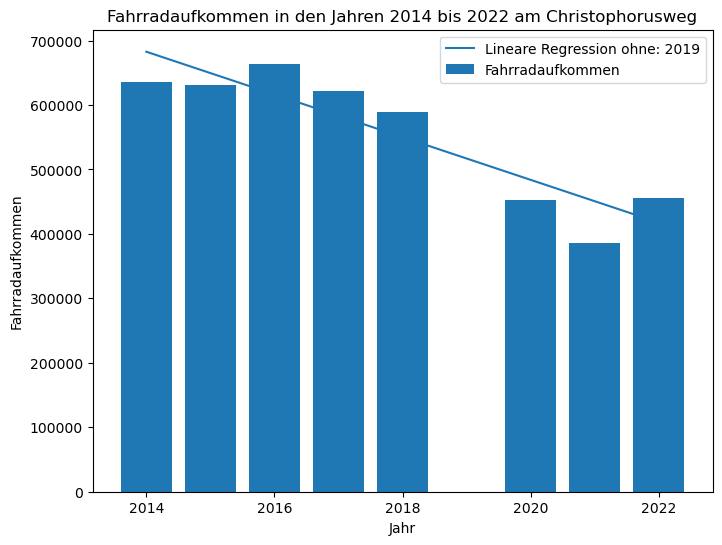

In [56]:
# Funktion für mehrfachverwendung
def plot_and_regression(df,location,not_this_year=0):
    
    # Nach Christophorusweg selektieren und nach Jahren gruppieren
    df["year"] = df["Time"].dt.year       
    df = df[(df["location"] == location)]
    df = df[(df["year"] != not_this_year) & (df["year"] !=2023) & (df["year"] > 2013)]
    df = df.groupby("year")["value"].sum().reset_index()
    
    # reshape damit beide arrays 2-D sind, wodurch ein Regression erstellt werden kann
    x = df["year"].values.reshape(-1,1)
    y = df["value"].values.reshape(-1,1)
    
    # Lineare Regression, x-Werte als Jahre, Y-Werte als Vorhersage mittels predict()
    model = LinearRegression().fit(x,y)
    x_values = df["year"].unique().reshape(-1,1)
    y_predictions = model.predict(x_values)
    label_for_plot = "Lineare Regression"
    
    # falls ein Jahr nicht in die Analyse miteinbezogen werden soll, label
    if(not_this_year):
        label_for_plot += " ohne: " +str(not_this_year)
    
    # P-Wert berechnen
    const = sm.add_constant(x)
    model = sm.OLS(y,const)
    results = model.fit()
    slope = results.params[1]
    slope_std_error = results.bse[1]
    t_value = slope/slope_std_error
    p_value = 2*(1-stats.t.cdf(np.abs(t_value),df.shape[0]-2))

    # Ergebnis
    print("P-Wert: " + str(p_value))
    
    # plotten
    plt.figure(figsize=(8,6))
    plt.bar(df["year"],df["value"],label="Fahrradaufkommen")
    plt.plot(x_values,y_predictions,label=label_for_plot)
    plt.xlabel("Jahr")
    plt.ylabel("Fahrradaufkommen")
    plt.title("Fahrradaufkommen in den Jahren 2014 bis 2022 am Christophorusweg")
    plt.legend()
    plt.show()
    
plot_and_regression(bikes_goettingen,"K61 Christophorusweg")
plot_and_regression(bikes_goettingen,"K61 Christophorusweg",2019)
# Da 2019 ungewöhnlice viele Fahrradfahrer gemessen wurden haben ich eine Regression mit 2019 und ohne 2019 von den Jahren 2014-2023
# erstellt. In beiden plots ist eine Tendenz nach unten zu erkennen (im plot ohne 2019 recht stark sogar). Was darauf schließen lässt
# dass im Laufe der Jahre eher weniger Menschen in Göttingen am Christophorusweg Fahrrad fahren. Dass die Zahlen ab 2020 soweit runter gehen kann allerdings
# auch daran liegen, dass 2020 Corona ausgebrochen ist und durch die "Lockdowns" immer weniger Menschen raus gegangen sind.
# Da der P-Wert mit dem Jahr 2019 bei 0.079 liegt, ist statistisch nicht abgesichert, dass der Trend tatsächlich eine Abnahme
# an Fahrradfahrern an dem Ort ist

In [25]:
!git add exam_sose2023.ipynb
!git commit -m "Bearbeitung der Maschine Learning Aufgabe: Überprüfung des Trends des Fahrradfahrens durch Linieare Regression und Kritik an dem Diagramm des Mibilitätskoordinators"

1237.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1242.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[master 126b58d] Bearbeitung der Maschine Learning Aufgabe: Überprüfung des Trends des Fahrradfahrens durch Linieare Regression und Kritik an dem Diagramm des Mibilitätskoordinators
 1 file changed, 250 insertions(+), 9 deletions(-)


In [26]:
!git log

1258.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


commit 126b58d206c7927467b797d795bb94e3c2cdd07d (HEAD -> master)
Author: cubeskills <paul-dinkler@t-online.de>
Date:   Sat Sep 2 16:38:09 2023 +0000

    Bearbeitung der Maschine Learning Aufgabe: Überprüfung des Trends des Fahrradfahrens durch Linieare Regression und Kritik an dem Diagramm des Mibilitätskoordinators

commit cee345c9a3e0447bf25b26ee9f75e047e4055662
Author: cubeskills <paul-dinkler@t-online.de>
Date:   Sat Sep 2 16:34:18 2023 +0000

    Bearbeitung der dritten Aufgabe: Statistische Analyse der Fahrradaufkommen

commit 2fe5671900ace6854f1ff8b97ac5cf47082e0e56
Author: cubeskills <paul-dinkler@t-online.de>
Date:   Sat Sep 2 16:33:00 2023 +0000

    Bearbeitung der zweiten Aufgabe: Visualisierung der Dataframes in Hinblick auf tägliches und stündliches Fahrradaufkommen an bestimmten Stationen

commit 9367a27d1cde37f76835429f20bd4767071fc02e
Author: cubeskills <paul-dinkler@t-online.de>
Date:   Sat Sep 2 16:30:34 2023 +0000

    Bearbeitung der zweiten Aufgabe: Visualisierun